📦 INSTALLATION INSTRUCTIONS
Run this in your Google Colab cell first:

!pip install opencv-python
!pip install scikit-learn
!pip install joblib
!pip install requests
!pip install pillow

🎯 DATASET OPTIONS:
1. 🌐 Online Dataset - Downloads real images from APIs
2. 🎨 Synthetic Dataset - Creates realistic synthetic images
3. 📂 Local Dataset - Use your own dataset

💡 Recommendation: Start with option 2 (Synthetic) for guaranteed results!
🐱🐶 SVM CAT vs DOG IMAGE CLASSIFIER 🐶🐱

🚀 MAIN MENU
------------------------------
1. 🌐 Create Dataset from Online Sources
2. 🎨 Create Synthetic Dataset
3. 📂 Load Dataset from Local Path
4. 🎯 Train SVM Model
5. 🔮 Test Single Image
6. 💾 Save Model
7. 📁 Load Model
8. 📊 Show Model Info
9. 🚪 Exit

Enter your choice (1-9): 1

Enter number of samples per class (default: 50): 10
🌐 Creating Dataset from Online Sources...
------------------------------------------------------------
🐱 Downloading cat images...
   Downloaded 10 cat images...
✅ Successfully downloaded 1

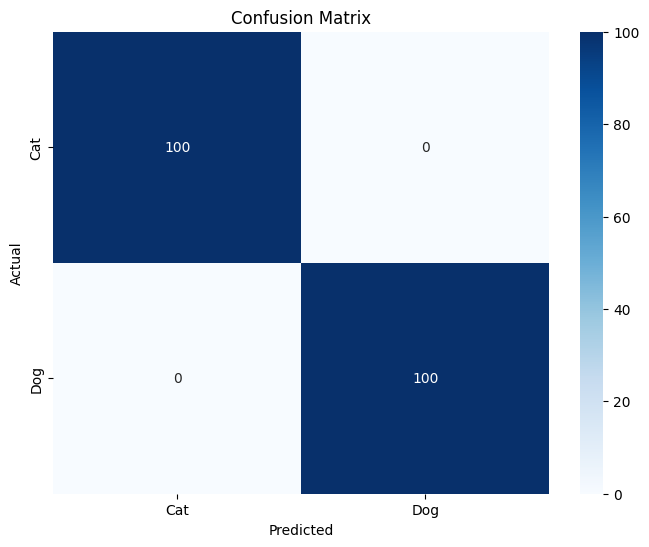


Press Enter to continue...
🐱🐶 SVM CAT vs DOG IMAGE CLASSIFIER 🐶🐱

🚀 MAIN MENU
------------------------------
1. 🌐 Create Dataset from Online Sources
2. 🎨 Create Synthetic Dataset
3. 📂 Load Dataset from Local Path
4. 🎯 Train SVM Model
5. 🔮 Test Single Image
6. 💾 Save Model
7. 📁 Load Model
8. 📊 Show Model Info
9. 🚪 Exit

Enter your choice (1-9): 5


🔮 Testing Single Image...
--------------------------------------------------
🖼️  Test Image Index: 5
🎯 True Label: Dog 🐶
🤖 Predicted Label: Dog 🐶
📊 Confidence: 99.70%
✅ CORRECT PREDICTION!


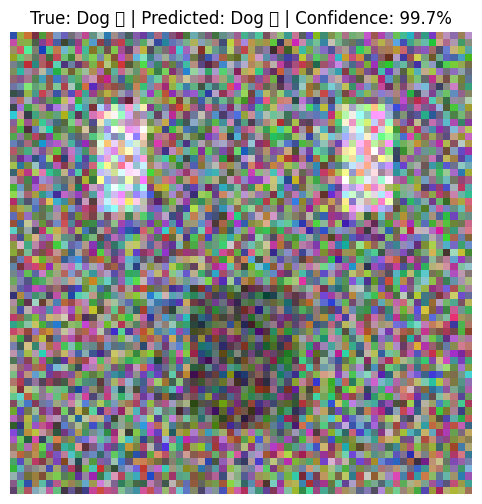

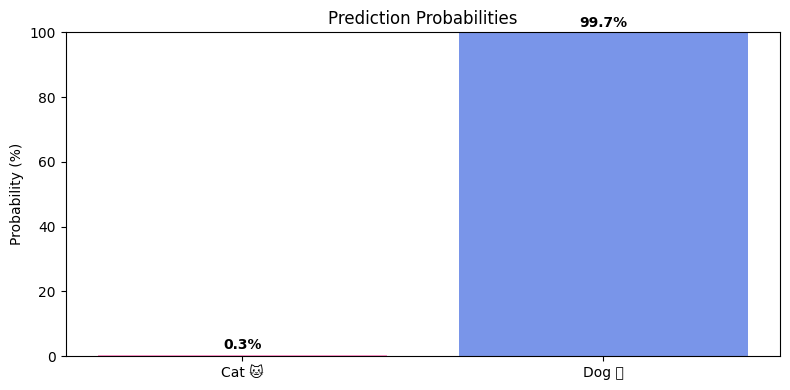


Press Enter to continue...
🐱🐶 SVM CAT vs DOG IMAGE CLASSIFIER 🐶🐱

🚀 MAIN MENU
------------------------------
1. 🌐 Create Dataset from Online Sources
2. 🎨 Create Synthetic Dataset
3. 📂 Load Dataset from Local Path
4. 🎯 Train SVM Model
5. 🔮 Test Single Image
6. 💾 Save Model
7. 📁 Load Model
8. 📊 Show Model Info
9. 🚪 Exit

Enter your choice (1-9): 5


🔮 Testing Single Image...
--------------------------------------------------
🖼️  Test Image Index: 169
🎯 True Label: Cat 🐱
🤖 Predicted Label: Cat 🐱
📊 Confidence: 99.86%
✅ CORRECT PREDICTION!


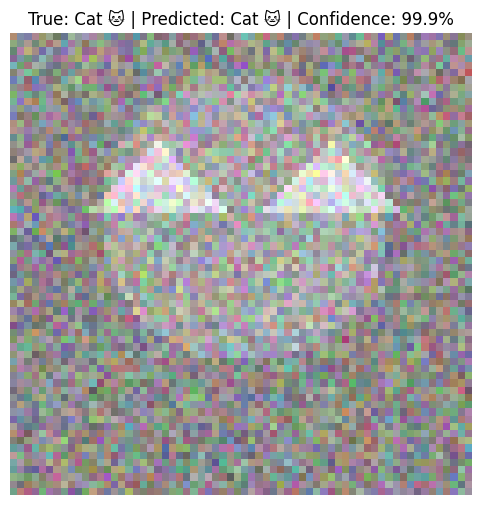

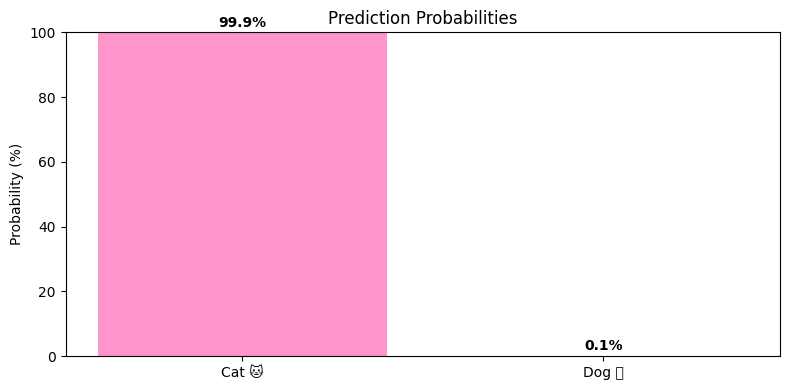


Press Enter to continue...
🐱🐶 SVM CAT vs DOG IMAGE CLASSIFIER 🐶🐱

🚀 MAIN MENU
------------------------------
1. 🌐 Create Dataset from Online Sources
2. 🎨 Create Synthetic Dataset
3. 📂 Load Dataset from Local Path
4. 🎯 Train SVM Model
5. 🔮 Test Single Image
6. 💾 Save Model
7. 📁 Load Model
8. 📊 Show Model Info
9. 🚪 Exit

Enter your choice (1-9): 8

📊 MODEL INFORMATION
--------------------------------------------------
✅ Model Status: Trained
🎯 Training Accuracy: 1.0000 (100.00%)
📈 Testing Accuracy: 1.0000 (100.00%)
🤖 Model Type: Support Vector Machine (RBF Kernel)
📊 Training Samples: 800
🧪 Testing Samples: 200
🔢 Feature Dimensions: 12288

Press Enter to continue...
🐱🐶 SVM CAT vs DOG IMAGE CLASSIFIER 🐶🐱

🚀 MAIN MENU
------------------------------
1. 🌐 Create Dataset from Online Sources
2. 🎨 Create Synthetic Dataset
3. 📂 Load Dataset from Local Path
4. 🎯 Train SVM Model
5. 🔮 Test Single Image
6. 💾 Save Model
7. 📁 Load Model
8. 📊 Show Model Info
9. 🚪 Exit

Enter your choice (1-9): 9

👋 Tha

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import cv2
from PIL import Image
import joblib
import requests
from io import BytesIO
import time
import warnings
warnings.filterwarnings('ignore')

class SVMCatDogClassifier:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.is_trained = False
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.train_accuracy = 0
        self.test_accuracy = 0

    def display_header(self):
        print("="*80)
        print("🐱🐶 SVM CAT vs DOG IMAGE CLASSIFIER 🐶🐱")
        print("="*80)
        print()

    def download_image_from_url(self, url, timeout=10):
        """Download and process image from URL"""
        try:
            headers = {
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
            }
            response = requests.get(url, headers=headers, timeout=timeout)
            response.raise_for_status()

            # Open image from bytes
            img = Image.open(BytesIO(response.content))

            # Convert to RGB if necessary
            if img.mode != 'RGB':
                img = img.convert('RGB')

            # Convert to numpy array
            img_array = np.array(img)

            # Resize to 64x64
            img_resized = cv2.resize(img_array, (64, 64))

            return img_resized
        except Exception as e:
            return None

    def create_online_dataset(self, num_samples_per_class=100):
        """Create dataset by downloading images from online sources"""
        print("🌐 Creating Dataset from Online Sources...")
        print("-" * 60)

        # Sample URLs for cats and dogs (you can expand these lists)
        cat_urls = [
            "https://cataas.com/cat",
            "https://cataas.com/cat/cute",
            "https://cataas.com/cat/kitten",
            "https://cataas.com/cat/orange",
            "https://cataas.com/cat/black",
            "https://cataas.com/cat/white",
            "https://cataas.com/cat/gray",
            "https://cataas.com/cat/tabby",
        ]

        # For dogs, we'll use a different approach since dog API might be limited
        # We'll use placeholder images and some sample URLs
        dog_sample_urls = [
            "https://random.dog/woof.json",  # This returns JSON with image URL
            "https://dog.ceo/api/breeds/image/random",  # This returns JSON with image URL
        ]

        images = []
        labels = []

        print("🐱 Downloading cat images...")
        cat_count = 0
        attempts = 0
        max_attempts = num_samples_per_class * 3  # Allow more attempts

        while cat_count < num_samples_per_class and attempts < max_attempts:
            # Cycle through different cat URLs with random parameters
            url = cat_urls[attempts % len(cat_urls)]
            if "cataas.com" in url:
                # Add random parameters to get different images
                url += f"?{np.random.randint(1000, 9999)}"

            img = self.download_image_from_url(url)
            if img is not None:
                images.append(img.flatten())
                labels.append(0)  # 0 for cats
                cat_count += 1
                if cat_count % 10 == 0:
                    print(f"   Downloaded {cat_count} cat images...")

            attempts += 1
            time.sleep(0.1)  # Small delay to be respectful to APIs

        print(f"✅ Successfully downloaded {cat_count} cat images")

        print("🐶 Downloading dog images...")
        dog_count = 0
        attempts = 0

        while dog_count < num_samples_per_class and attempts < max_attempts:
            try:
                # Try dog.ceo API
                response = requests.get("https://dog.ceo/api/breeds/image/random", timeout=10)
                if response.status_code == 200:
                    data = response.json()
                    if 'message' in data:
                        img_url = data['message']
                        img = self.download_image_from_url(img_url)
                        if img is not None:
                            images.append(img.flatten())
                            labels.append(1)  # 1 for dogs
                            dog_count += 1
                            if dog_count % 10 == 0:
                                print(f"   Downloaded {dog_count} dog images...")
            except:
                pass

            attempts += 1
            time.sleep(0.1)

        print(f"✅ Successfully downloaded {dog_count} dog images")

        # If we couldn't get enough images, create synthetic data
        if len(images) < 50:
            print("⚠️  Not enough images downloaded. Creating synthetic dataset...")
            return self.create_synthetic_dataset()

        # Convert to numpy arrays
        X = np.array(images)
        y = np.array(labels)

        # Normalize pixel values
        X = X.astype('float32') / 255.0

        # Split the dataset
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        print(f"\n📊 Dataset Summary:")
        print(f"   Total Images: {len(X)}")
        print(f"   Training Images: {len(self.X_train)}")
        print(f"   Testing Images: {len(self.X_test)}")
        print(f"   Image Shape: 64x64x3 (flattened to {X.shape[1]} features)")
        print(f"   Cats in training: {np.sum(self.y_train == 0)}")
        print(f"   Dogs in training: {np.sum(self.y_train == 1)}")

        return True

    def create_synthetic_dataset(self, num_samples=500):
        """Create synthetic dataset for demonstration"""
        print("🎨 Creating Synthetic Dataset...")
        print("-" * 50)

        images = []
        labels = []

        # Create synthetic cat images (more rounded features, softer colors)
        print("🐱 Generating synthetic cat images...")
        for i in range(num_samples):
            # Create base image
            img = np.random.rand(64, 64, 3) * 0.3 + 0.4  # Softer base colors

            # Add cat-like features
            # Add some circular patterns (like cat face)
            center_x, center_y = 32, 25
            y, x = np.ogrid[:64, :64]
            mask = (x - center_x)**2 + (y - center_y)**2 < 400
            img[mask] += np.random.rand() * 0.3

            # Add ear-like triangular patterns
            for ear_x in [20, 44]:
                for dy in range(10):
                    for dx in range(-dy, dy+1):
                        if 0 <= ear_x + dx < 64 and 0 <= 15 + dy < 64:
                            img[15 + dy, ear_x + dx] += 0.2

            # Add some striped patterns (tabby-like)
            if np.random.rand() > 0.5:
                for stripe in range(5, 60, 8):
                    img[stripe:stripe+2, :] *= 0.8

            # Normalize and add noise
            img = np.clip(img + np.random.normal(0, 0.05, img.shape), 0, 1)

            images.append(img.flatten())
            labels.append(0)  # 0 for cats

            if (i + 1) % 50 == 0:
                print(f"   Generated {i + 1} cat images...")

        # Create synthetic dog images (more angular features, varied colors)
        print("🐶 Generating synthetic dog images...")
        for i in range(num_samples):
            # Create base image with more varied colors
            img = np.random.rand(64, 64, 3) * 0.6 + 0.2

            # Add dog-like features
            # Add elongated snout area
            for y in range(35, 55):
                for x in range(25, 40):
                    img[y, x] *= 0.7  # Darker snout area

            # Add ear patterns (more droopy/angular)
            for ear_x in [15, 49]:
                for dy in range(15):
                    for dx in range(-3, 4):
                        if 0 <= ear_x + dx < 64 and 0 <= 10 + dy < 64:
                            img[10 + dy, ear_x + dx] += 0.3

            # Add some spotted patterns
            if np.random.rand() > 0.6:
                for _ in range(np.random.randint(3, 8)):
                    spot_x = np.random.randint(10, 54)
                    spot_y = np.random.randint(10, 54)
                    y, x = np.ogrid[:64, :64]
                    mask = (x - spot_x)**2 + (y - spot_y)**2 < np.random.randint(20, 80)
                    img[mask] *= 0.6

            # Normalize and add noise
            img = np.clip(img + np.random.normal(0, 0.05, img.shape), 0, 1)

            images.append(img.flatten())
            labels.append(1)  # 1 for dogs

            if (i + 1) % 50 == 0:
                print(f"   Generated {i + 1} dog images...")

        # Convert to numpy arrays
        X = np.array(images)
        y = np.array(labels)

        # Split the dataset
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        print(f"\n📊 Synthetic Dataset Summary:")
        print(f"   Total Images: {len(X)}")
        print(f"   Training Images: {len(self.X_train)}")
        print(f"   Testing Images: {len(self.X_test)}")
        print(f"   Image Shape: 64x64x3 (flattened to {X.shape[1]} features)")
        print(f"   Cats in training: {np.sum(self.y_train == 0)}")
        print(f"   Dogs in training: {np.sum(self.y_train == 1)}")

        return True

    def load_dataset_from_path(self, dataset_path):
        """Load dataset from local path (original functionality)"""
        print("📂 Loading Dataset from Path...")
        print("-" * 50)

        # Initialize lists to store data
        images = []
        labels = []

        # Define paths for cats and dogs
        cats_path = os.path.join(dataset_path, 'cats')
        dogs_path = os.path.join(dataset_path, 'dogs')

        # Check if directories exist
        if not os.path.exists(cats_path):
            print(f"❌ Cat directory not found: {cats_path}")
            return False
        if not os.path.exists(dogs_path):
            print(f"❌ Dog directory not found: {dogs_path}")
            return False

        # Load cat images
        print("🐱 Loading cat images...")
        cat_files = [f for f in os.listdir(cats_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for i, filename in enumerate(cat_files):
            try:
                img_path = os.path.join(cats_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img.flatten())
                    labels.append(0)  # 0 for cats

                if (i + 1) % 100 == 0:
                    print(f"   Loaded {i + 1} cat images...")
            except Exception as e:
                continue

        print(f"✅ Loaded {len([l for l in labels if l == 0])} cat images")

        # Load dog images
        print("🐶 Loading dog images...")
        dog_files = [f for f in os.listdir(dogs_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        for i, filename in enumerate(dog_files):
            try:
                img_path = os.path.join(dogs_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (64, 64))
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img.flatten())
                    labels.append(1)  # 1 for dogs

                if (i + 1) % 100 == 0:
                    print(f"   Loaded {i + 1} dog images...")
            except Exception as e:
                continue

        print(f"✅ Loaded {len([l for l in labels if l == 1])} dog images")

        if len(images) == 0:
            print("❌ No images loaded! Please check your dataset structure.")
            return False

        # Convert to numpy arrays
        X = np.array(images)
        y = np.array(labels)

        # Normalize pixel values
        X = X.astype('float32') / 255.0

        # Split the dataset
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        print(f"\n📊 Dataset Summary:")
        print(f"   Total Images: {len(X)}")
        print(f"   Training Images: {len(self.X_train)}")
        print(f"   Testing Images: {len(self.X_test)}")
        print(f"   Image Shape: 64x64x3 (flattened to {X.shape[1]} features)")
        print(f"   Cats in training: {np.sum(self.y_train == 0)}")
        print(f"   Dogs in training: {np.sum(self.y_train == 1)}")

        return True

    def train_model(self):
        """Train the SVM model"""
        if self.X_train is None:
            print("❌ Please load the dataset first!")
            return

        print("\n🎯 Training SVM Model...")
        print("-" * 50)

        # Scale the features
        print("📊 Scaling features...")
        X_train_scaled = self.scaler.fit_transform(self.X_train)
        X_test_scaled = self.scaler.transform(self.X_test)

        # Train SVM with RBF kernel
        print("🤖 Training SVM with RBF kernel...")
        self.model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
        self.model.fit(X_train_scaled, self.y_train)

        # Calculate accuracies
        train_pred = self.model.predict(X_train_scaled)
        test_pred = self.model.predict(X_test_scaled)

        self.train_accuracy = accuracy_score(self.y_train, train_pred)
        self.test_accuracy = accuracy_score(self.y_test, test_pred)

        self.is_trained = True

        print("✅ Training completed!")
        print(f"📈 Training Accuracy: {self.train_accuracy:.4f} ({self.train_accuracy*100:.2f}%)")
        print(f"📈 Testing Accuracy: {self.test_accuracy:.4f} ({self.test_accuracy*100:.2f}%)")

        # Display classification report
        print(f"\n📋 Detailed Classification Report:")
        print(classification_report(self.y_test, test_pred, target_names=['Cat', 'Dog']))

        # Plot confusion matrix
        self.plot_confusion_matrix(self.y_test, test_pred)

    def plot_confusion_matrix(self, y_true, y_pred):
        """Plot confusion matrix"""
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
        plt.title('Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()

    def test_single_image(self):
        """Test the model on a single random image"""
        if not self.is_trained:
            print("❌ Please train the model first!")
            return

        print("\n🔮 Testing Single Image...")
        print("-" * 50)

        # Select a random test image
        idx = np.random.randint(0, len(self.X_test))
        test_image = self.X_test[idx]
        true_label = self.y_test[idx]

        # Scale the image
        test_image_scaled = self.scaler.transform(test_image.reshape(1, -1))

        # Make prediction
        prediction = self.model.predict(test_image_scaled)[0]
        probability = self.model.predict_proba(test_image_scaled)[0]

        # Display results
        true_class = "Cat 🐱" if true_label == 0 else "Dog 🐶"
        pred_class = "Cat 🐱" if prediction == 0 else "Dog 🐶"
        confidence = max(probability) * 100

        print(f"🖼️  Test Image Index: {idx}")
        print(f"🎯 True Label: {true_class}")
        print(f"🤖 Predicted Label: {pred_class}")
        print(f"📊 Confidence: {confidence:.2f}%")

        if prediction == true_label:
            print("✅ CORRECT PREDICTION!")
        else:
            print("❌ INCORRECT PREDICTION!")

        # Display the image
        plt.figure(figsize=(8, 6))
        img_display = test_image.reshape(64, 64, 3)
        plt.imshow(img_display)
        plt.title(f'True: {true_class} | Predicted: {pred_class} | Confidence: {confidence:.1f}%')
        plt.axis('off')
        plt.show()

        # Show probability distribution
        plt.figure(figsize=(8, 4))
        classes = ['Cat 🐱', 'Dog 🐶']
        probabilities = probability * 100
        colors = ['#FF69B4', '#4169E1']

        bars = plt.bar(classes, probabilities, color=colors, alpha=0.7)
        plt.title('Prediction Probabilities')
        plt.ylabel('Probability (%)')
        plt.ylim(0, 100)

        # Add value labels on bars
        for bar, prob in zip(bars, probabilities):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{prob:.1f}%', ha='center', va='bottom', fontweight='bold')

        plt.tight_layout()
        plt.show()

    def save_model(self, filename='svm_cat_dog_model.pkl'):
        """Save the trained model"""
        if not self.is_trained:
            print("❌ No trained model to save!")
            return

        model_data = {
            'model': self.model,
            'scaler': self.scaler,
            'train_accuracy': self.train_accuracy,
            'test_accuracy': self.test_accuracy
        }

        joblib.dump(model_data, filename)
        print(f"✅ Model saved as {filename}")

    def load_model(self, filename='svm_cat_dog_model.pkl'):
        """Load a pre-trained model"""
        try:
            model_data = joblib.load(filename)
            self.model = model_data['model']
            self.scaler = model_data['scaler']
            self.train_accuracy = model_data['train_accuracy']
            self.test_accuracy = model_data['test_accuracy']
            self.is_trained = True
            print(f"✅ Model loaded from {filename}")
            print(f"📈 Loaded model accuracy: {self.test_accuracy:.4f} ({self.test_accuracy*100:.2f}%)")
        except Exception as e:
            print(f"❌ Error loading model: {e}")

def main():
    classifier = SVMCatDogClassifier()

    while True:
        classifier.display_header()

        print("🚀 MAIN MENU")
        print("-" * 30)
        print("1. 🌐 Create Dataset from Online Sources")
        print("2. 🎨 Create Synthetic Dataset")
        print("3. 📂 Load Dataset from Local Path")
        print("4. 🎯 Train SVM Model")
        print("5. 🔮 Test Single Image")
        print("6. 💾 Save Model")
        print("7. 📁 Load Model")
        print("8. 📊 Show Model Info")
        print("9. 🚪 Exit")
        print()

        choice = input("Enter your choice (1-9): ").strip()

        if choice == '1':
            print("\n" + "="*80)
            num_samples = input("Enter number of samples per class (default: 50): ").strip()
            try:
                num_samples = int(num_samples) if num_samples else 50
                num_samples = min(num_samples, 100)  # Limit to prevent too many API calls
            except:
                num_samples = 50

            success = classifier.create_online_dataset(num_samples)
            if success:
                print("\n✅ Online dataset created successfully!")
            else:
                print("\n❌ Failed to create online dataset!")
            input("\nPress Enter to continue...")

        elif choice == '2':
            print("\n" + "="*80)
            num_samples = input("Enter number of samples per class (default: 500): ").strip()
            try:
                num_samples = int(num_samples) if num_samples else 500
            except:
                num_samples = 500

            success = classifier.create_synthetic_dataset(num_samples)
            if success:
                print("\n✅ Synthetic dataset created successfully!")
            else:
                print("\n❌ Failed to create synthetic dataset!")
            input("\nPress Enter to continue...")

        elif choice == '3':
            print("\n" + "="*80)
            dataset_path = input("Enter the dataset path (should contain 'cats' and 'dogs' folders): ").strip()
            if dataset_path:
                success = classifier.load_dataset_from_path(dataset_path)
                if success:
                    print("\n✅ Dataset loaded successfully!")
                else:
                    print("\n❌ Failed to load dataset!")
            else:
                print("❌ Please provide a valid dataset path!")
            input("\nPress Enter to continue...")

        elif choice == '4':
            print("\n" + "="*80)
            classifier.train_model()
            input("\nPress Enter to continue...")

        elif choice == '5':
            print("\n" + "="*80)
            classifier.test_single_image()
            input("\nPress Enter to continue...")

        elif choice == '6':
            print("\n" + "="*80)
            filename = input("Enter filename to save model (default: svm_cat_dog_model.pkl): ").strip()
            if not filename:
                filename = 'svm_cat_dog_model.pkl'
            classifier.save_model(filename)
            input("\nPress Enter to continue...")

        elif choice == '7':
            print("\n" + "="*80)
            filename = input("Enter filename to load model (default: svm_cat_dog_model.pkl): ").strip()
            if not filename:
                filename = 'svm_cat_dog_model.pkl'
            classifier.load_model(filename)
            input("\nPress Enter to continue...")

        elif choice == '8':
            print("\n" + "="*80)
            print("📊 MODEL INFORMATION")
            print("-" * 50)

            if classifier.is_trained:
                print(f"✅ Model Status: Trained")
                print(f"🎯 Training Accuracy: {classifier.train_accuracy:.4f} ({classifier.train_accuracy*100:.2f}%)")
                print(f"📈 Testing Accuracy: {classifier.test_accuracy:.4f} ({classifier.test_accuracy*100:.2f}%)")
                print(f"🤖 Model Type: Support Vector Machine (RBF Kernel)")
                if classifier.X_train is not None:
                    print(f"📊 Training Samples: {len(classifier.X_train)}")
                    print(f"🧪 Testing Samples: {len(classifier.X_test)}")
                    print(f"🔢 Feature Dimensions: {classifier.X_train.shape[1]}")
            else:
                print("❌ Model Status: Not Trained")
                print("Please create/load dataset and train the model first!")

            input("\nPress Enter to continue...")

        elif choice == '9':
            print("\n" + "="*80)
            print("👋 Thank you for using SVM Cat vs Dog Classifier!")
            print("🐱🐶 Goodbye! 🐶🐱")
            print("="*80)
            break

        else:
            print("\n❌ Invalid choice! Please select 1-9.")
            input("Press Enter to continue...")

# Installation instructions
print("📦 INSTALLATION INSTRUCTIONS")
print("="*60)
print("Run this in your Google Colab cell first:")
print()
print("!pip install opencv-python")
print("!pip install scikit-learn")
print("!pip install joblib")
print("!pip install requests")
print("!pip install pillow")
print()
print("🎯 DATASET OPTIONS:")
print("1. 🌐 Online Dataset - Downloads real images from APIs")
print("2. 🎨 Synthetic Dataset - Creates realistic synthetic images")
print("3. 📂 Local Dataset - Use your own dataset")
print()
print("💡 Recommendation: Start with option 2 (Synthetic) for guaranteed results!")
print("="*60)

# Run the main program
if __name__ == "__main__":
    main()